In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

def coin_flips(n=1000, odds=1.97): 
    '''
    Simulates 1000 coin flips for a single punter, 
    betting at 1.97 odds, 
    also calcultes new winnings 
    '''
    
    ## create a pandas dataframe for storing coin flip reksults 
    ## and calculate net winnings 
    df = pd.DataFrame()
    
    ## insert n number of coin flips 0=loss, 1=win 
    df['result'] = np.random.randint(2, size=n)

    ## calculate new winnings 
    df['net'] = np.where(df['result'] == 1, odds-1, -1)
    ## calculate cumulattive new winnings 
    df['cum_net'] = df['net'].cumsum()
    
    return df 

<AxesSubplot:>

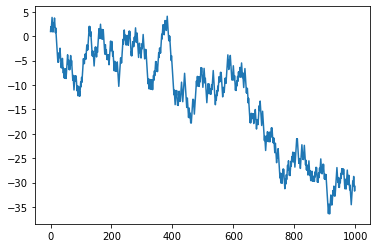

In [3]:
coin_flips()['cum_net'].plot()

In [11]:
## multiple punter bettings 
def many_coin_flips(punters = 100, n = 10000, odds=1.97, color = 'r'): 
    '''
    Simulates 10000 coinflips for 100 different punters, 
    all betting at 1.97 odds, 
    also calculates and plots new winnings for each punter 
    '''
    
    ## create pandas dataframes for storing punter results 
    
    punter_df = pd.DataFrame()
    
    ## loop through all punters 
    for i in np.arange(punters):
        
        ## simulate coin flips 
        df = coin_flips(n, odds)
        
        ## calculate net 
        net = df['net'].sum()
        
        ## append to our punter dataframes 
        punter_df = punter_df.append({'odds':odds, 
                                      'net':net}, ignore_index = True)
        
        ## Plot th cumulatiave winnings over time 
        df['cum_net'].plot(color=color, alpha=0.1)
        
    ## check if punters ended up in profit 
    punter_df['winning'] = np.where(punter_df['net'] > 0, 1, 0)
    
    return punter_df

,net,odds,winning
0,-53.47,1.97,0
1,-83.02,1.97,0
2,-268.20,1.97,0
3,-254.41,1.97,0
4,-81.05,1.97,0
...,...,...,...
95,-197.28,1.97,0
96,-333.21,1.97,0
97,-248.50,1.97,0
98,-84.99,1.97,0


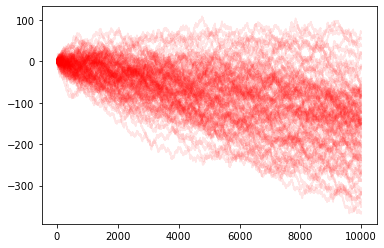

In [12]:
many_coin_flips()

In [13]:
## betting at different odds 
def compare_odds(punters=100, n=10000, odds=[1.97, 2.00, 2.03]): 
    '''
    Simulates and compare coin flip net winnings 
    after 10000 flips for 3 groups of punters, 
    betting at odds of 1.97, 2.00, and 2.03, respectively. 
    Also plots every punters net winnings 
    '''
    
    ## create figure and ax objects to plot on 
    fig, ax = plt.subplots()
    
    ## set y coordinates for annotating text for each group of punters 
    ys = [0.25, 0.5, 0.75]
    
    ## assign colors to each group of punters 
    cs = ['r', 'y', 'g']
    
    ## loop through the groups of punters, with their respective odds, 
    ## chosen color and y for annottating text 
    for odd, color, y in zip(odds, cs, ys): 
        ## run coin flip simulations with given odds, plot with chosen color
        df = many_coin_flips(punters, n, odd, color)
        ## calculate how many punters in the group ended up in profit
        winning_punters = df['winning'].mean()
        
        ## set a text to annotate 
        win_text = '%.2f: %.0f%%' %(odd, winning_punters * 100)
        
        ## annotate odds and chance of profit for each group of punters 
        ax.annotate(win_text, xy = (1.02, y), 
                   xycoords='axes fraction', 
                   color=color, 
                   va='center')
    
    ## set title 
    ax.set_title("Chances of ending up in profit after %s coin flips" %n)
    
    ## set x and y axis labels 
    ax.set_xlabel("Number of flips")
    ax.set_ylabel("Net Profit")
    
    ## add annotation 'legend'
    ax.annotate('odds: chance', xy = (1.02, 1.0),
                xycoords=('axes fraction'), fontsize = 10, va = 'center'
               )
    
    ## add horizontal line at breakeven point 
    plt.axhline(color='k', alpha=0.5)
    
    ## set y axis range at some nice number 
    ax.set_ylim(-450, 450)
    
    ## show plot 
    plt.show()

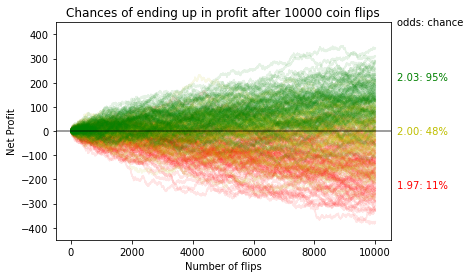

In [15]:
compare_odds()

## References: 

1. https://taketheshot.co/2017/02/07/flipping-coins-and-the-importance-of-betting-at-the-highest-odds/